In [1]:
%matplotlib inline
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'


In [2]:
import os
dirname = "/Volumes/simulation_data_2018/MDPl2_output_mocks"
basename_z0p0 = "logsm_gt8p5_sfr_catalog_1.000000_value_added.hdf5"
basename_z0p65 = "logsm_gt8p5_sfr_catalog_0.600800_value_added.hdf5"
basename_z0p8 = "logsm_gt8p5_sfr_catalog_0.549800_value_added.hdf5"

from astropy.table import Table
mock_z0p0 = Table.read(os.path.join(dirname, basename_z0p0), path='data')
mock_z0p8 = Table.read(os.path.join(dirname, basename_z0p8), path='data')

v4p5_dirname = "/Volumes/simulation_data_2018/protoDC2_v4p5/highz_red_fraction_experimentation"
basename = "recolored_umachine_color_mock_v4.5_m000-259.hdf5"
v4p5_mock_z0p8 = Table.read(os.path.join(v4p5_dirname, basename), path='data')

basename = "recolored_umachine_color_mock_v4.5_m000-499.hdf5"
v4p5_mock_z0p0 = Table.read(os.path.join(v4p5_dirname, basename), path='data')


/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from cosmodc2.stellar_mass_remapping import remap_stellar_mass_in_snapshot

mock_z0p0['new_mstar'] = remap_stellar_mass_in_snapshot(
    0.0, mock_z0p0['mpeak'], mock_z0p0['obs_sm'])

mock_z0p8['new_mstar'] = remap_stellar_mass_in_snapshot(
    0.8, mock_z0p8['mpeak'], mock_z0p8['obs_sm'])


In [4]:
from cosmodc2.sdss_colors.sigmoid_magr_model import magr_monte_carlo

# kwargs1 = dict(delta_magr_highz_table=[-4.5, -4, -3, -1, -1, -1, -1])
kwargs_dndmag_validated1 = dict(delta_magr_highz_table=[-6, -5, -4, -1, -0.5, -0.5, -0.5])

mock_z0p0['mag_r'] = magr_monte_carlo(
    mock_z0p0['obs_sm'], mock_z0p0['upid'], np.zeros(len(mock_z0p0)), **kwargs_dndmag_validated1)
mock_z0p8['mag_r'] = magr_monte_carlo(
    mock_z0p8['obs_sm'], mock_z0p8['upid'], np.zeros(len(mock_z0p8))+0.8, **kwargs_dndmag_validated1)
mock_z0p0['mag_r2'] = magr_monte_carlo(
    mock_z0p0['new_mstar'], mock_z0p0['upid'], np.zeros(len(mock_z0p0)), **kwargs_dndmag_validated1)
mock_z0p8['mag_r2'] = magr_monte_carlo(
    mock_z0p8['new_mstar'], mock_z0p8['upid'], np.zeros(len(mock_z0p8))+0.8, **kwargs_dndmag_validated1)


In [5]:
# kwargs2 = dict(delta_magr_highz_table=[-6, -5, -4, -1, -0.5, -0.5, -0.5])
kwargs_dndmag_validated2 = dict(
    delta_magr_highz_table=[-6, -6., -4, -0.75, -0.75, -0.75, -0.75])

mock_z0p0['new_mag_r'] = magr_monte_carlo(
    mock_z0p0['obs_sm'], mock_z0p0['upid'], np.zeros(len(mock_z0p0)), **kwargs_dndmag_validated2)
mock_z0p8['new_mag_r'] = magr_monte_carlo(
    mock_z0p8['obs_sm'], mock_z0p8['upid'], np.zeros(len(mock_z0p8))+0.8, **kwargs_dndmag_validated2)
mock_z0p0['new_mag_r2'] = magr_monte_carlo(
    mock_z0p0['new_mstar'], mock_z0p0['upid'], np.zeros(len(mock_z0p0)), **kwargs_dndmag_validated2)
mock_z0p8['new_mag_r2'] = magr_monte_carlo(
    mock_z0p8['new_mstar'], mock_z0p8['upid'], np.zeros(len(mock_z0p8))+0.8, **kwargs_dndmag_validated2)


## Validate the absolute r-band luminosity function

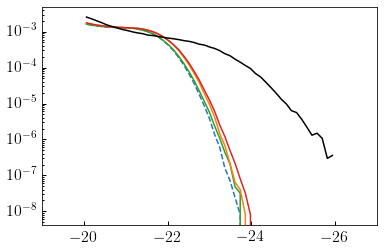

In [6]:
def lumfunc(x, xbins, Lbox=500.):
    counts, __ = np.histogram(x, xbins, density=False)
    xmids = 0.5*(xbins[:-1] + xbins[1:])
    return counts/Lbox**3., xmids
    
fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')

rbins = np.linspace(-26, -20, 50)
lf_z0p0a, rmids = lumfunc(mock_z0p0['mag_r'], rbins)
lf_z0p0b, rmids = lumfunc(mock_z0p0['mag_r2'], rbins)

lf_z0p8a, rmids = lumfunc(mock_z0p8['mag_r'], rbins)
lf_z0p8b, rmids = lumfunc(mock_z0p8['mag_r2'], rbins)

lf_z0p0c, rmids = lumfunc(mock_z0p0['new_mag_r'], rbins)
lf_z0p0d, rmids = lumfunc(mock_z0p0['new_mag_r2'], rbins)

lf_z0p8c, rmids = lumfunc(mock_z0p8['new_mag_r'], rbins)
lf_z0p8d, rmids = lumfunc(mock_z0p8['new_mag_r2'], rbins)

lf_z0p8_v4p5, rmids = lumfunc(
    v4p5_mock_z0p8['restframe_extincted_sdss_abs_magr'], rbins, Lbox=256.)

# __=ax.plot(rmids, lf_z0p0d, '--', color=mred)

__=ax.plot(rmids, lf_z0p8a, '--', color=mblue)
__=ax.plot(rmids, lf_z0p8b, color=mgreen)
__=ax.plot(rmids, lf_z0p8c, color=morange)
__=ax.plot(rmids, lf_z0p8d, color=mred)

__=ax.plot(rmids, lf_z0p8_v4p5, color='k')

# __=ax.hist(mock_z0p8['mag_r'], bins=rbins, alpha=0.8, color=mred)
# __=ax.hist(mock_z0p0['mag_r'], bins=rbins, alpha=0.8, color=mgreen)
# __=ax.hist(mock_z0p0['mag_r2'], bins=rbins, alpha=0.8, color=mblue)

xlim = ax.set_xlim(-19, -27)


## Validate cluster CLF 

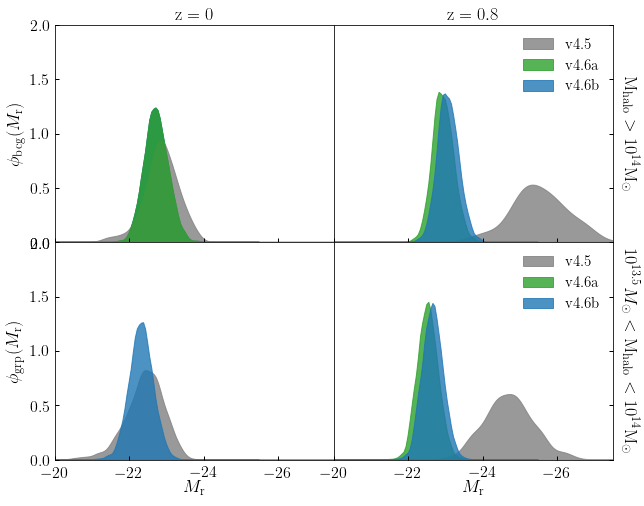

In [18]:
cluster_bcg_mask_z0p0 = (mock_z0p0['mvir'] > 10**14) & (mock_z0p0['upid'] == -1)
cluster_bcg_mask_z0p8 = (mock_z0p8['mvir'] > 10**14) & (mock_z0p8['upid'] == -1)

group_cen_mask_z0p0 = (mock_z0p0['mvir'] > 10**13.5) & (mock_z0p0['upid'] == -1) 
group_cen_mask_z0p0 *= (mock_z0p0['mvir'] < 10**14)
group_cen_mask_z0p8 = (mock_z0p8['mvir'] > 10**13.5) & (mock_z0p8['upid'] == -1) 
group_cen_mask_z0p8 *= (mock_z0p8['mvir'] < 10**14)

rbins = np.linspace(-25.5, -20, 100)

from scipy.stats import gaussian_kde

kde_cl_mag_r_z0p8 = gaussian_kde(mock_z0p8['mag_r'][cluster_bcg_mask_z0p8])
kde_cl_mag_r2_z0p8 = gaussian_kde(mock_z0p8['mag_r2'][cluster_bcg_mask_z0p8])
kde_cl_new_mag_r_z0p8 = gaussian_kde(mock_z0p8['new_mag_r'][cluster_bcg_mask_z0p8])
kde_cl_new_mag_r2_z0p8 = gaussian_kde(mock_z0p8['new_mag_r2'][cluster_bcg_mask_z0p8])

pdf_cl_mag_r_z0p8 = kde_cl_mag_r_z0p8.evaluate(rbins)
pdf_cl_mag_r2_z0p8 = kde_cl_mag_r2_z0p8.evaluate(rbins)
pdf_cl_new_mag_r_z0p8 = kde_cl_new_mag_r_z0p8.evaluate(rbins)
pdf_cl_new_mag_r2_z0p8 = kde_cl_new_mag_r2_z0p8.evaluate(rbins)

kde_cl_mag_r_z0p0 = gaussian_kde(mock_z0p0['mag_r'][cluster_bcg_mask_z0p0])
kde_cl_mag_r2_z0p0 = gaussian_kde(mock_z0p0['mag_r2'][cluster_bcg_mask_z0p0])
kde_cl_new_mag_r_z0p0 = gaussian_kde(mock_z0p0['new_mag_r'][cluster_bcg_mask_z0p0])
kde_cl_new_mag_r2_z0p0 = gaussian_kde(mock_z0p0['new_mag_r2'][cluster_bcg_mask_z0p0])

pdf_cl_mag_r_z0p0 = kde_cl_mag_r_z0p0.evaluate(rbins)
pdf_cl_mag_r2_z0p0 = kde_cl_mag_r2_z0p0.evaluate(rbins)
pdf_cl_new_mag_r_z0p0 = kde_cl_new_mag_r_z0p0.evaluate(rbins)
pdf_cl_new_mag_r2_z0p0 = kde_cl_new_mag_r2_z0p0.evaluate(rbins)

kde_gr_mag_r_z0p8 = gaussian_kde(mock_z0p8['mag_r'][group_cen_mask_z0p8])
kde_gr_mag_r2_z0p8 = gaussian_kde(mock_z0p8['mag_r2'][group_cen_mask_z0p8])
kde_gr_new_mag_r_z0p8 = gaussian_kde(mock_z0p8['new_mag_r'][group_cen_mask_z0p8])
kde_gr_new_mag_r2_z0p8 = gaussian_kde(mock_z0p8['new_mag_r2'][group_cen_mask_z0p8])

pdf_gr_mag_r_z0p8 = kde_gr_mag_r_z0p8.evaluate(rbins)
pdf_gr_mag_r2_z0p8 = kde_gr_mag_r2_z0p8.evaluate(rbins)
pdf_gr_new_mag_r_z0p8 = kde_gr_new_mag_r_z0p8.evaluate(rbins)
pdf_gr_new_mag_r2_z0p8 = kde_gr_new_mag_r2_z0p8.evaluate(rbins)

kde_gr_mag_r_z0p0 = gaussian_kde(mock_z0p0['mag_r'][group_cen_mask_z0p0])
kde_gr_mag_r2_z0p0 = gaussian_kde(mock_z0p0['mag_r2'][group_cen_mask_z0p0])
kde_gr_new_mag_r_z0p0 = gaussian_kde(mock_z0p0['new_mag_r'][group_cen_mask_z0p0])
kde_gr_new_mag_r2_z0p0 = gaussian_kde(mock_z0p0['new_mag_r2'][group_cen_mask_z0p0])

pdf_gr_mag_r_z0p0 = kde_gr_mag_r_z0p0.evaluate(rbins)
pdf_gr_mag_r2_z0p0 = kde_gr_mag_r2_z0p0.evaluate(rbins)
pdf_gr_new_mag_r_z0p0 = kde_gr_new_mag_r_z0p0.evaluate(rbins)
pdf_gr_new_mag_r2_z0p0 = kde_gr_new_mag_r2_z0p0.evaluate(rbins)

cluster_bcg_mask_z0p0_v4p5 = (v4p5_mock_z0p0['mpeak'] > 10**14)
cluster_bcg_mask_z0p0_v4p5 *= (v4p5_mock_z0p0['upid'] == -1)
cluster_bcg_mask_z0p8_v4p5 = (v4p5_mock_z0p8['mpeak'] > 10**14)
cluster_bcg_mask_z0p8_v4p5 *= (v4p5_mock_z0p8['upid'] == -1)

group_cen_mask_z0p0_v4p5 = (v4p5_mock_z0p0['upid'] == -1)
group_cen_mask_z0p0_v4p5 *= (v4p5_mock_z0p0['mpeak'] < 10**14)
group_cen_mask_z0p0_v4p5 *= (v4p5_mock_z0p0['mpeak'] > 10**13.5)

group_cen_mask_z0p8_v4p5 = (v4p5_mock_z0p8['upid'] == -1)
group_cen_mask_z0p8_v4p5 *= (v4p5_mock_z0p8['mpeak'] < 10**14)
group_cen_mask_z0p8_v4p5 *= (v4p5_mock_z0p8['mpeak'] > 10**13.5)

kde_cl_new_mag_r2_z0p0_v4p5 = gaussian_kde(
    v4p5_mock_z0p0['restframe_extincted_sdss_abs_magr'][cluster_bcg_mask_z0p0_v4p5])
kde_cl_new_mag_r2_z0p8_v4p5 = gaussian_kde(
    v4p5_mock_z0p8['restframe_extincted_sdss_abs_magr'][cluster_bcg_mask_z0p8_v4p5])
kde_gr_new_mag_r2_z0p0_v4p5 = gaussian_kde(
    v4p5_mock_z0p0['restframe_extincted_sdss_abs_magr'][group_cen_mask_z0p0_v4p5])
kde_gr_new_mag_r2_z0p8_v4p5 = gaussian_kde(
    v4p5_mock_z0p8['restframe_extincted_sdss_abs_magr'][group_cen_mask_z0p8_v4p5])

rbins2 = np.linspace(-28, -20, 150)
pdf_cl_mag_r_z0p0_v4p5 = kde_cl_new_mag_r2_z0p0_v4p5.evaluate(rbins2)
pdf_cl_mag_r_z0p8_v4p5 = kde_cl_new_mag_r2_z0p8_v4p5.evaluate(rbins2)
pdf_gr_mag_r_z0p0_v4p5 = kde_gr_new_mag_r2_z0p0_v4p5.evaluate(rbins2)
pdf_gr_mag_r_z0p8_v4p5 = kde_gr_new_mag_r2_z0p8_v4p5.evaluate(rbins2)


fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4
fig.subplots_adjust(hspace=0)  #  smash top and bottom plots
fig.subplots_adjust(wspace=0)  #  smash left and right plots
ax2.yaxis.set_label_position("right")  #  y-labels on the right
ax2.yaxis.tick_right()  #  y-ticks on the right
ax4.yaxis.set_label_position("right")  #  y-labels on the right
ax4.yaxis.tick_right()  #  y-ticks on the right


                    
# __=ax1.fill(rbins, pdf_cl_mag_r_z0p0, color=mred, alpha=0.8)
# __=ax1.fill(rbins, pdf_cl_new_mag_r_z0p0, color=morange, alpha=0.8)
__=ax1.fill(rbins, pdf_cl_mag_r2_z0p0, color=mgreen, alpha=0.8)
__=ax1.fill(rbins, pdf_cl_new_mag_r2_z0p0, color=mblue, alpha=0.8)

__=ax1.fill(rbins2, pdf_cl_mag_r_z0p0_v4p5, color='gray', alpha=0.8, label=r'${\rm v4.5}$')
__=ax2.fill(rbins2, pdf_cl_mag_r_z0p8_v4p5, color='gray', alpha=0.8, label=r'${\rm v4.5}$')
__=ax3.fill(rbins2, pdf_gr_mag_r_z0p0_v4p5, color='gray', alpha=0.8, label=r'${\rm v4.5}$')
__=ax4.fill(rbins2, pdf_gr_mag_r_z0p8_v4p5, color='gray', alpha=0.8, label=r'${\rm v4.5}$')

# __=ax2.fill(rbins, pdf_cl_mag_r_z0p8, color=mred, alpha=0.8)
# __=ax2.fill(rbins, pdf_cl_new_mag_r_z0p8, color=morange, alpha=0.8)
__=ax2.fill(rbins, pdf_cl_mag_r2_z0p8, color=mgreen, alpha=0.8, label=r'${\rm v4.6a}$')
__=ax2.fill(rbins, pdf_cl_new_mag_r2_z0p8, color=mblue, alpha=0.8, label=r'${\rm v4.6b}$')

# __=ax3.fill(rbins, pdf_gr_mag_r_z0p0, color=mred, alpha=0.8)
# __=ax1.fill(rbins, pdf_cl_new_mag_r_z0p0, color=morange, alpha=0.8)
__=ax1.fill(rbins, pdf_cl_mag_r2_z0p0, color=mgreen, alpha=0.8)
__=ax3.fill(rbins, pdf_gr_new_mag_r2_z0p0, color=mblue, alpha=0.8)

# __=ax4.fill(rbins, pdf_gr_mag_r_z0p8, color=mred, alpha=0.8)
# __=ax4.fill(rbins, pdf_gr_new_mag_r_z0p8, color=morange, alpha=0.8)
__=ax4.fill(rbins, pdf_gr_mag_r2_z0p8, color=mgreen, alpha=0.8, label=r'${\rm v4.6a}$')
__=ax4.fill(rbins, pdf_gr_new_mag_r2_z0p8, color=mblue, alpha=0.8, label=r'${\rm v4.6b}$')

xlim = ax1.set_xlim(-20, -27.5)
ylim = ax1.set_ylim(0, 2)
xlabel3 = ax3.set_xlabel(r'$M_{\rm r}$')
xlabel4 = ax4.set_xlabel(r'$M_{\rm r}$')
ylabel1 = ax1.set_ylabel(r'${\phi_{\rm bcg}(M_{\rm r})}$')
ylabel3 = ax3.set_ylabel(r'${\phi_{\rm grp}(M_{\rm r})}$')
title1 = ax1.set_title(r'${\rm z=0}$')
title2 = ax2.set_title(r'${\rm z=0.8}$')
ylabel2 = ax2.set_ylabel(r'${\rm M_{\rm halo} > 10^{14}M_{\odot}}$', 
                         rotation=-90, labelpad=25)
ylabel4 = ax4.set_ylabel(r'$10^{13.5}M_{\odot} < {\rm M_{\rm halo} < 10^{14}M_{\odot}}$', 
                         rotation=-90, labelpad=25)
legend2 = ax2.legend()
legend4 = ax4.legend()

figname = '/Users/aphearin/Desktop/group_cluster_bcg_clf_v4p6_calibration.png'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')